# Names 
Student 1 Name and JHED: Sarah Khan (skhan102)

Student 2 Name and JHED: Disha Mishra (dmishra4)

# Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as date
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold

# fix random number generator for reproducibility
np.random.seed(0)

# Read Data

In [3]:
#===========================================
# Read data.  Change DATAPATH if necessary
#===========================================
try:
    # Executes if running in Google Colab
    from google.colab import drive
    drive.mount('gdrive/')
    DATAPATH = "gdrive/My Drive/" # Change path to location of data if necessary
except:
    # Executes if running locally (e.g. Anaconda)
    DATAPATH = "./"

# Read training data
traindata = pd.read_csv('/'.join((DATAPATH,'glm.training.data.csv')))
X = traindata.iloc[:,1:29].values # Rows are patients, columns are clinical indicators
y = traindata.iloc[:,-1].values

# Read testing data
testdata = pd.read_csv('/'.join((DATAPATH,'glm.test.data.csv')))
Xtest = testdata.iloc[:,1:29].values
ytest = testdata.iloc[:,-1].values

Mounted at gdrive/


# Train generalized linear model (i.e. logistic regression)

AUC of ROC curve = 0.922617214324509


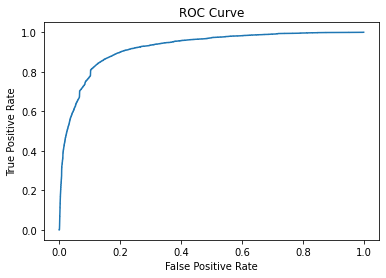

In [4]:
# Normalize Training (zero mean, unity standard deviation)
X  = X-np.mean(X,axis=0)
X  = X/np.std(X,axis=0)

# Normalize Testing Data.
Xtest  = Xtest - np.mean(Xtest,axis=0)
Xtest  = Xtest/np.std(Xtest,axis=0)

# Create the model using stochastic gradient descent 
sgd = SGDClassifier(loss = 'log', alpha = .0001, penalty = 'l1', class_weight= 'balanced')
# Initialize the model using training data 
sgd.fit(X, y) 

# Get the predictions based on input training data 
ytrainPred = sgd.predict_proba(X)
# Get lists that will be used to plot ROC curve
falsePosR, truePosR, thresholdVals = roc_curve(y, ytrainPred[:, 1])
#Plot ROC Curve 
plt.figure()
plt.title('ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(falsePosR, truePosR)
# Get area under the ROC curve
print("AUC of ROC curve = " + str(auc(falsePosR, truePosR)))


# Refine the model

In [5]:
"""
Write Your code here
"""
# create testing set of lambdas and initialize list to store AUC in 
lambdaTest = [0.1, 0.01, 0.001, 0.0001, 0.00001];
lAUC = [];

# create subset of numbers that will be used to test by splitting the data
s = KFold(n_splits = 4, shuffle = True);

for i in lambdaTest:
  # initialize list to store each AUC 
  tAUC = [];
  # go in a for-loop to generate training and testing for each fold 
  for tr,te in s.split(X):
    xtr = X[tr];
    xte = X[te]; 
    ytr = y[tr];
    yte = y[te];

    # find SGD classifier 
    sgdClass = SGDClassifier(loss = 'log', alpha = i, penalty = 'l1', class_weight = 'balanced', max_iter = 10000);
    sgdClass.fit(xtr, ytr);

    yH = sgdClass.predict_proba(xtr)[:,1];
    fpr, tpr, thr = roc_curve(ytr, yH);
    tAUC.append(auc(fpr,tpr));
  mtAUC = np.mean(tAUC);
  lAUC.append(mtAUC);


mInd = np.argmax(lAUC)
print("Optimal Regularization Value is: ", lambdaTest[mInd])

Optimal Regularization Value is:  0.001


# ROC curve on Testing data

AUC of testing ROC curve = 0.660512185851408
AUC of training ROC curve  = 0.9394856199913725


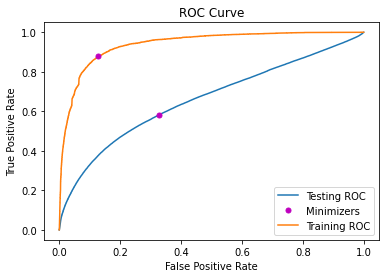

In [12]:
"""
Write Your code here
"""
# Essentially repeat part b except now we will use the optimal lambda value 

# Create the model using stochastic gradient descent 
sgd = SGDClassifier(loss = 'log', alpha = lambdaTest[mInd], penalty = 'l1', class_weight= 'balanced')
# Initialize the model using training data 
sgd.fit(X, y) 
# Get the predictions based on input training data 
ytestPred = sgd.predict_proba(Xtest)
# Get lists that will be used to plot ROC curve
falsePosR, truePosR, thresholdVals = roc_curve(ytest, ytestPred[:, 1])


# Get the index corresponding to the threshold value with the smallest dist mag
# Getting the distance for each fpr, tpr combination from (0, 1)
distances = (1 - truePosR)**2 + (falsePosR)**2
# Getting the index associated with the fpr, tpr that's closest to (0, 1)
bestThreshInd = np.argmin(distances)

# Plot the refined ROC curve from optimized lambda
plt.figure()
plt.title('ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(falsePosR, truePosR)

# Plot a point representing where we get closest to (0, 1)
# The best fpr, tpr combination can be accessed with bestThreshInd
plt.plot(falsePosR[bestThreshInd], truePosR[bestThreshInd], "m.", markersize=10)


# Print the area under the curve 
print("AUC of testing ROC curve = " + str(auc(falsePosR, truePosR)))

# Plot the ROC curve corresponding to training data
# Get the predictions based on input training data 
ytrainPred = sgd.predict_proba(X)
# Get lists that will be used to plot ROC curve
falsePosR, truePosR, thresholdVals = roc_curve(y, ytrainPred[:, 1])
# Getting the distance for each fpr, tpr combination from (0, 1)
distances = (1 - truePosR)**2 + (falsePosR)**2
# Getting the index associated with the fpr, tpr that's closest to (0, 1)
bestThreshInd = np.argmin(distances)
plt.plot(falsePosR, truePosR)
plt.plot(falsePosR[bestThreshInd], truePosR[bestThreshInd], "m.", markersize=10)
print("AUC of training ROC curve  = " + str(auc(falsePosR, truePosR)))
plt.legend(('Testing ROC', 'Minimizers','Training ROC'))

# Early Warning Time (Bonus)

In [ ]:
# Loading timestamp data
timestamps = pd.read_csv('/'.join((DATAPATH,'test.timestamps.csv')))['x'].values
timeonset  = pd.read_csv('/'.join((DATAPATH,'test.onsets.csv')))['onsets'].values

"""
Write Your code here
"""